# 2장 신경망의 수학적 구성 요소

[케라스 창시자에게 배우는 딥러닝] 책을 기반으로 제가 정리하고 요약한 내용입니다.  
1장은 머신러닝과 딥러닝의 전반적인 용어나 개념이 있어서 빠르게 읽고 넘어갔습니다. 

## 2.1 신경망과의 첫 만남

흑백 손글씨 숫자 이미지(28x28픽셀)를 10개의 범주(0에서 9까지)로 분류하는 **MNIST** 문제입니다.  
머신러닝, 딥러닝계의 ```"hello world"```라고 생각해도 됩니다.

머신러닝에서 분류 문제의 **범주**(category)를 **클래스**(class)라고 합니다. 데이터 포인트는 **샘플**(sample)이라고 합니다. 특정 샘플의 클래스는 **레이블**(label)이라고 합니다.

MNIST 데이터셋은 넘파이(numpy) 배열 형태로 케라스에 이미 포함되어 있습니다.

In [0]:
# 코드 2-1 케라스에서 MNIST 데이터셋 적재하기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [0]:
print('훈련 데이터 shape: ',train_images.shape)
print('테스트 데이터 shape: ', test_images.shape)

훈련 데이터 shape:  (60000, 28, 28)
테스트 데이터 shape:  (10000, 28, 28)


In [0]:
# 코드 2-2 신경망 구조
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 **층** (layer)입니다.   
어떤 데이터가 들어가면 더 유용한 형태로 출력됩니다. 즉, 주어진 문제에 더 의미 있는 표현(representation)을 추출합니다.

여기선 **완전 연결**(fully connected)된 Dense 층 2개와, 마지막에 총 10개의 확률 점수가 들어 있는 배열을 반환하는 **소프트맥스**(softmax)층입니다.

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 3가지가 더 필요합니다.
* 손실 함수(loss function)
* 옵티마이저(optimizer)
* 훈련과 테스트 과정을 모니터링할 지표

In [0]:
# 코드 2-3 컴파일 단계
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정하는 **전처리** 과정이 필요합니다.  
이미지의 경우 보통 픽셀의 최댓값인 255로 나누어 사용합니다.

In [0]:
# 코드 2-4 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

또 레이블을 범주형으로 인코딩해야 합니다.

In [0]:
# 코드 2-5 레이블 준비하기
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

이제 fit 메소드를 호출하여 훈련 데이터에 모델을 학습시킵니다.

In [0]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.2567 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.1045 - acc: 0.96870s - loss: 0.1047 - acc: 0.
Epoch 3/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0699 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0517 - acc: 0.9842 1s
Epoch 5/5
60000/60000 [==============================] - 11s 180us/step - loss: 0.0382 - acc: 0.98877s - loss: 0.0


훈련하는 동안 2개의 정보가 출력됩니다.  
훈련 데이터에 대한 네트워크의 **손실**과 **정확도**입니다.

이제 테스트 셋에서도 모델이 잘 작동하는지 확인해 보겠습니다.

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 96us/step
test_acc: 0.9775


테스트 셋의 정확도는 97.75%로 훈련 셋의 정확도인 98.87%보다는 약간 낮습니다. 이러한 이유는 **과대적합**(overfitting) 때문입니다.  
이는 머신 러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말합니다.

## 2.2 신경망을 위한 데이터 표현

여기선 방금 보았던 코드 하나하나를 상세하게 설명하고 이들이 의미하는 바를 알아보겠습니다. 최근의 모든 머신 러닝 시스템은 **텐서**(tensor)라 부르는 다차원 넘파이 배열을 기본 데이터 구조로 사용합니다.

텐서는 데이터를 위한 컨테이너입니다. 텐서는 임의의 차원 개수를 가지는 행렬의 모습입니다.(텐서에서는 차원을 종종 축이라고 부릅니다.)

### 2.2.1 스칼라(0D 텐서)

하나의 숫자만 담고 있는 텐서를 **스칼라**(scalar)라고 부릅니다. 넘파이에서는 float32나 float64 타입의 숫자가 스칼라 텐서입니다.  
스칼라 텐서의 축 개수는 0입니다.(ndim == 0) 텐서의 축 개수를 **랭크**(rank)라고 부릅니다.

### 2.2.2 벡터(1D 텐서)

숫자의 배열을 **벡터**(vector) 또는 1D 텐서라고 부릅니다. **ndim == 1**  
5D 벡터와 5D 텐서를 혼동하면 안됩니다! 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것이고 5D 텐서는 5개의 축을 가진 것입니다.

### 2.2.3 행렬(2D 텐서)

벡터의 배열이 **행렬**(matrix) 또는 2D 텐서입니다. **ndim == 2**

### 2.2.4 3D 텐서와 고차원 텐서

행렬들을 하나의 새로운 배열로 합치면 3D 텐서가 만들어집니다. 딥러닝에서는 보통 0D에서 4D까지의 텐서를 다루고, 동영상 데이터를 다룰 경우는 5D 텐서까지 가기도 합니다.

### 2.2.5 텐서 핵심 속성

* 축의 개수(랭크) : 예를 들어 3D 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이 있습니다.
* 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple)입니다. 3D 텐서의 shape은 (3, 3, 5)와 같이 나타낼 수 있습니다.
* 데이터 타입 : 텐서에 포함된 데이터의 타입입니다. 예를 들어 텐서의 타입은 float32, float64, uint8 등이 될 수 있습니다. 가변 길이의 문자열은 지원하지 않습니다.

축의 개수 : ```ndim``` , 배열의 크기(shape) : ```shape``` , 데이터 타입 : ```dtype```

In [0]:
# MNIST 예제 사용
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


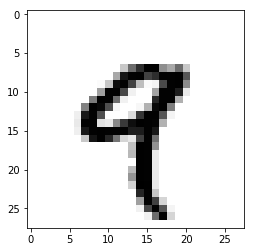

In [0]:
# 코드 2-6 다섯 번째 이미지 출력하기
digit = train_images[4]

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.6 넘파이로 텐서 조작하기

배열에 있는 특정 원소들을 선택하는 것을 **슬라이싱**(slicing)이라고 합니다.  
넘파이 배열에서 할 수 있는 슬라이싱 연산을 보겠습니다.

다음 예는 11번재에서 101번째까지(101번째는 포함하지 않고) 숫자를 선택하여 (90, 28, 28) 크기의 배열을 만듭니다.

In [0]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


똑같지만 더 자세한 표현은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정하는 것입니다. :(콜론)은 전체 인덱스를 선택합니다.

In [0]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


### 2.2.7 배치 데이터

모든 데이터 텐서의 첫 번째 축(인덱스가 0부터 시작하므로 0번째 축)은 **샘플 축**(sample axis)입니다.  
딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않고 데이터를 작은 **배치**(batch)로 나눕니다.
배치 데이터를 다룰 때는 첫 번째 축(0번 축)을 **배치 축**(batch axis) 또는 **배치 차원**(batch dimension)이라고 부릅니다.

### 2.2.8 텐서의 실제 사례

* **벡터 데이터**: (samples, features) 크기의 2D 텐서
* **시계열 데이터** 또는 **시퀀스(sequence) 데이터**: (samples, timesteps, features) 크기의 3D 텐서
* **이미지**: (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
* **동영상**: (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

### 2.2.9 벡터 데이터

대부분의 경우에 해당됩니다. 여기서 첫 번째 축은 **샘플 축**이고, 두 번째 축은 **특성 축**(feature axis)입니다.
* 사람의 나이, 우편번호, 소득으로 구성된 인구 통계 데이터. 각 사람은 3개의 값을 가진 벡터로 구성되고 10만명이 포함된 전체 데이터 셋은 (100000, 3) 크기의 텐서에 저장될 수 있습니다.

### 2.2.10 시계열 데이터 또는 시퀀스 데이터

데이터에서 시간이 (또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 3D 텐서로 저장됩니다.
* 주식 가격 데이터셋
* 트윗 데이터셋

### 2.2.11 이미지 데이터

이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어집니다. 흑백 이미지의 경우 컬러 채널의 차원 크기는 1입니다.  
텐서플로에서는 채널 마지막 방식을 사용하여 (samples, height, width, color_depth)처럼 컬러 채널의 깊이를 끝에 놓습니다. 케라스는 씨아노의 채널 우선 방식도 지원하는데 저는 텐서플로를 공부했기 때문에 따로 씨아노는 보지 않겠습니다.

### 2.2.12 비디오 데이터

비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안 되는 데이터 중 하나입니다.

## 2.3 신경망의 톱니바퀴: 텐서 연산

심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 **텐서 연산**(tensor operation)으로 나타낼 수 있습니다.

### 2.3.1 원소별 연산

이 연산은 텐서에 있는 각 원소에 독립적으로 적용됩니다. 이것은 즉, 고도의 병렬 구현이 가능한 연산이라는 의미입니다.

### 2.3.2 브로드캐스팅

크기가 다른 텐서를 연산할 수 있습니다.
1. 큰 텐서의 ndim에 맞도록 작은 텐서에 (브로드캐스팅 축이라고 부르는) 축이 추가됩니다.
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됩니다.

### 2.3.3 텐서 점곱

**점곱 연산**(dot operation)은 원소별 연산과 반대로 입력 텐서의 원소들을 결합시킵니다.  
넘파이, 케라스에서 dot 연산자를 사용하고, 텐서플로에서는 tf.matmul(x, y)처럼 사용합니다.

### 2.3.4 텐서 크기 변환

텐서의 크기를 변환한다는 것은 특정 크기에 맞게 열과 행을 재배열한다는 뜻입니다. **전치**(transposition)도 많이 사용됩니다.  
ex) ```train_images = train_images.reshape((60000, 28 * 28))```

### 2.3.5 텐서 연산의 기하학적 해석

텐서 연산이 조작하는 텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석될 수 있기 때문에 모든 텐서 연산은 기하학적 해석이 가능합니다.  
이건 선형대수 영상을 보는것이 좋을 것 같습니다.

### 2.3.6 딥러닝의 기하학적 해석

복잡하고 심하게 꼬여 있는 데이터의 매니폴드에 대한 깔끔한 표현을 찾는 일입니다.

## 2.4 신경망의 엔진: 그래디언트 기반 최적화

```output = relut(dot(W, input) + b)```  
이 식에서 텐서 W와 b는 **가중치**(weight)와 **편향**(bias) 또는 **훈련되는 파라미터**(trainable parameter)라고 부릅니다.  
초기에는 가중치 행렬이 작은 난수로 채워져 있습니다. 즉, 의미 없는 표현이 만들어집니다. 그 다음에는 역전파(backpropagation)에 의해 가중치가 점진적으로 조정될 것입니다. 이것이 머신러닝 학습의 핵심입니다.  

훈련은 다음 단계가 반복됩니다.
1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출합니다.
2. x를 사용하여 네트워크를 실행하고(forward pass), 예측 y_pred를 구합니다.
3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산합니다.
4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트합니다.

신경망에 사용된 모든 연산이 **미분 가능**하다는 장점을 사용하여 네트워크 가중치에 대한 손실의 **그래디언트**를 계산하는 것이 좋은 방법입니다.

### 2.4.1 변화율이란?
### 2.4.2 텐서 연산의 변화율: 그래디언트


그래디언트는 텐서 연산의 변화율(기울기)입니다. 그래디언트에 따라서 아래 그림에서 한발자국 움직이기를 반복하여 그래디언트가 0이 되는 곳에서 멈춥니다.  
아래 그림은 Sung Kim님의 모두를 위한 딥러닝 강좌에서 캡쳐하였습니다.

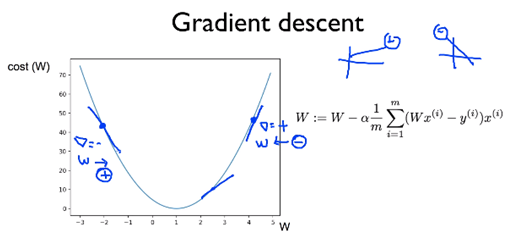

In [7]:
from IPython.display import Image
Image('gradient.PNG')

### 2.4.3 확률적 경사 하강법

미분 가능한 함수가 주어지면 이론적으로 이 함수의 최솟값을 해석적으로 구할 수 있습니다. 함수의 최솟값은 변화율(기울기)이 0인 지점입니다. 우리는 변화율이 0이 되는 지점을 모두 찾고 이 중에서 어떤 포인트의 함수 값이 가장 작은지 확인하는 것입니다.  
* 반복마다 하나의 샘플과 하나의 타깃을 뽑는 것이 **SGD**입니다.  
* 이와 반대로 가용한 모든 데이터를 사용하여 반복을 실행하는 것이 **배치 SGD**(batch SGD)입니다.


이 2가지의 절충안인 적절한 크기의 미니 배치를 사용하는 **미니 배치 확률적 경사 하강법**(mini-batch SGD)이 있습니다.  
다른 **최적화 방법 또는 옵티마이저**들도 있습니다. Adagrad, Adam, RMSProp 등입니다.

### 2.4.4 변화율 연결: 역전파 알고리즘

**연쇄 법칙(chain rule)** 이라 불리는 f(g(x))′=f′g(x)∗g′(x) 를 신경망의 그래디언트 계산에 적용하여 **역전파**(back propagation) 알고리즘이 탄생되었습니다.  
 
이렇게 노드가 몇개인지는 모르겠지만 체인 룰을 사용하게 되면 끝에 있는 값을 얼마 바꿨을 때 최종값에 어떤 영향을 주는지 알 수 있게 됩니다.

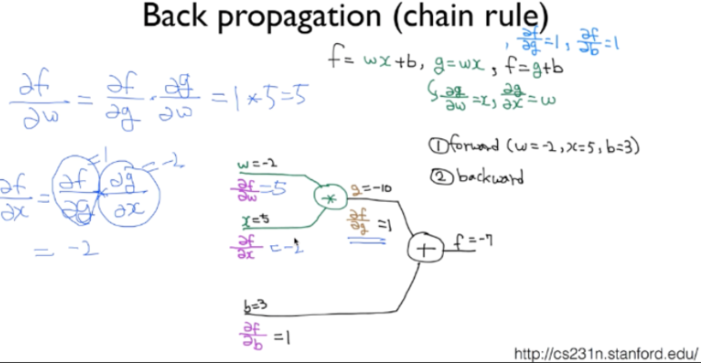

In [8]:
from IPython.display import Image
Image('backpropagation.PNG')

## 2.5 첫 번째 예제 다시 살펴보기
생략

## 2.6 요약
생략

오랜만에 기초 개념들을 복습하는 시간이었습니다. 이렇게 정리하는게 정말 유용한 것 같습니다. 하지만 너무 개념에 시간을 쓸 필요는 없고 빠르게 개념을 정리한 뒤 실제 프로젝를 하는 것이 좋습니다.